In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from functions import *
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
bureau = pd.read_csv(r"C:\Users\oe\Desktop\HomeCreditDefaultRisk\data\bureau.csv")

In [3]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
bureau.shape

(1716428, 17)

In [5]:
bureau.loc[(bureau["CREDIT_ACTIVE"] == "Bad debt"),"CREDIT_ACTIVE"] = "Active"
bureau.loc[(bureau["CREDIT_ACTIVE"] == "Sold"),"CREDIT_ACTIVE"] = "Active"
bureau.loc[(bureau["CREDIT_ACTIVE"] == "Closed"),"CREDIT_ACTIVE"] = 0
bureau.loc[(bureau["CREDIT_ACTIVE"] == "Active"),"CREDIT_ACTIVE"] = 1
bureau["CREDIT_ACTIVE"] = bureau["CREDIT_ACTIVE"].astype("int")

In [6]:
missing_values_table(bureau)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


# Kategorik Değişken Analizi

In [7]:
cat_cols, num_cols, other_cols = cols(bureau,"CREDIT_ACTIVE",noc=10,ID=True)

Number of Categorical Columns: 1
['CREDIT_CURRENCY']
--------------------------------------------------
Number of Numerical Columns: 12
['SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']
--------------------------------------------------
['CNT_CREDIT_PROLONG', 'CREDIT_TYPE']
--------------------------------------------------


CATEGORICAL FEATURE ANALYSIS

CREDIT_CURRENCY : has 4 unique category 	- object

                 CREDIT_CURRENCY    Count      Ratio  TARGET_MEAN
CREDIT_CURRENCY                                                  
currency 1               1715020  1716428  99.917969     0.371400
currency 2                  1224  1716428   0.071311     0.131536
currency 3                   174  1716428   0.010137     0.201149
currency 4                    10  1716428   0.000583     0.100000




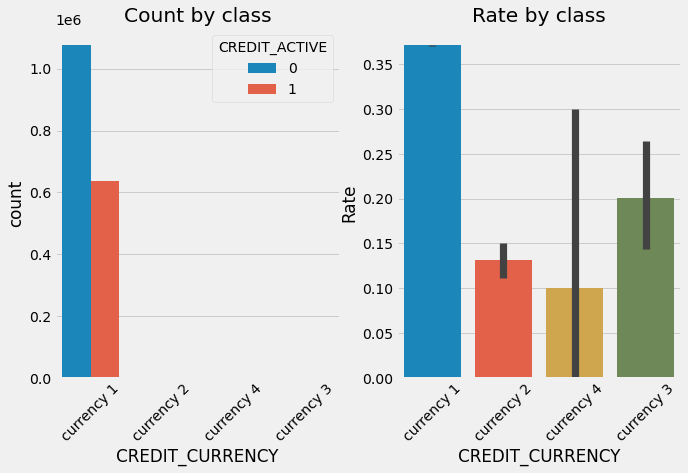




1 categorical variables have been described

There are 0 variables have more than 10 classes

Variable names have more than 10 classes:

[]


In [8]:
cat_summary(bureau,cat_cols,"CREDIT_ACTIVE",noc=10)

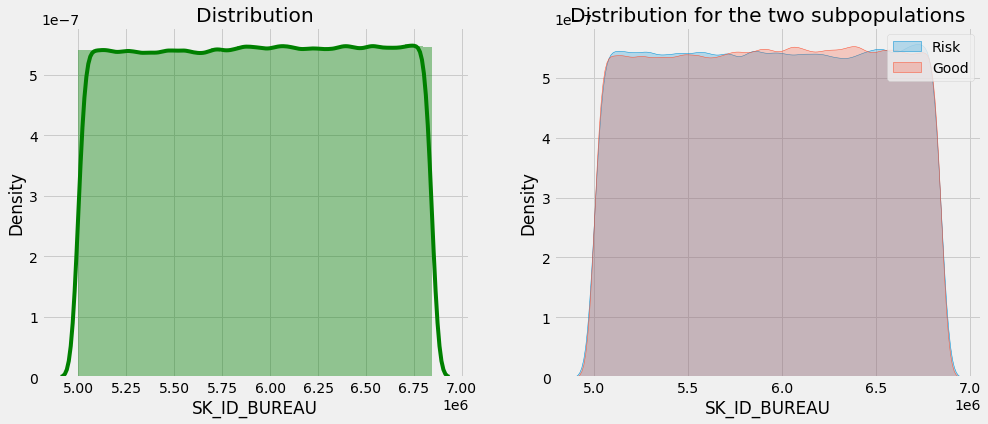

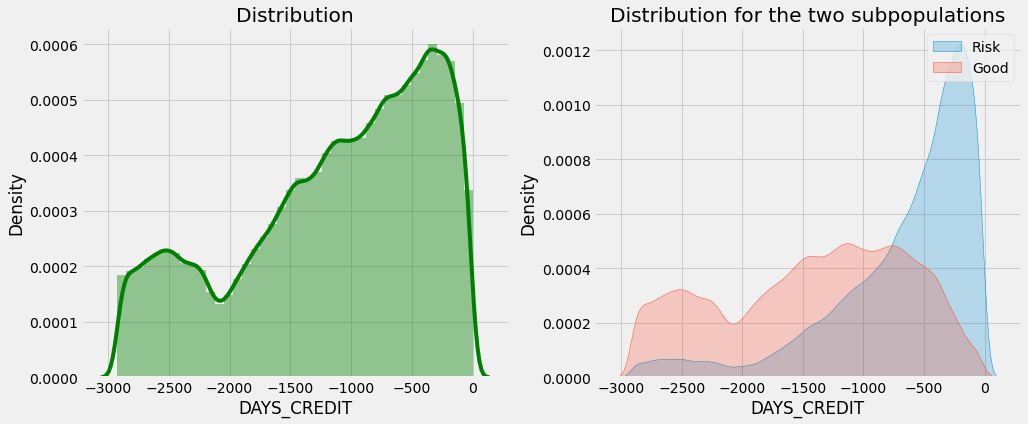

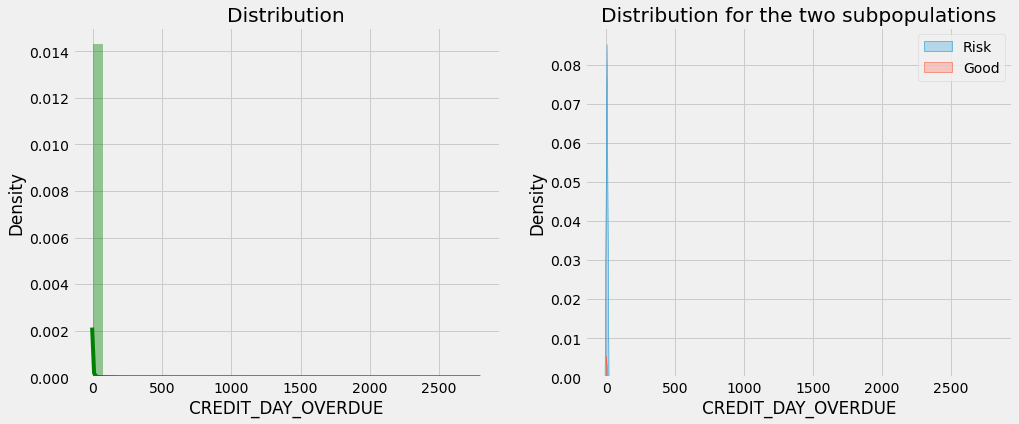

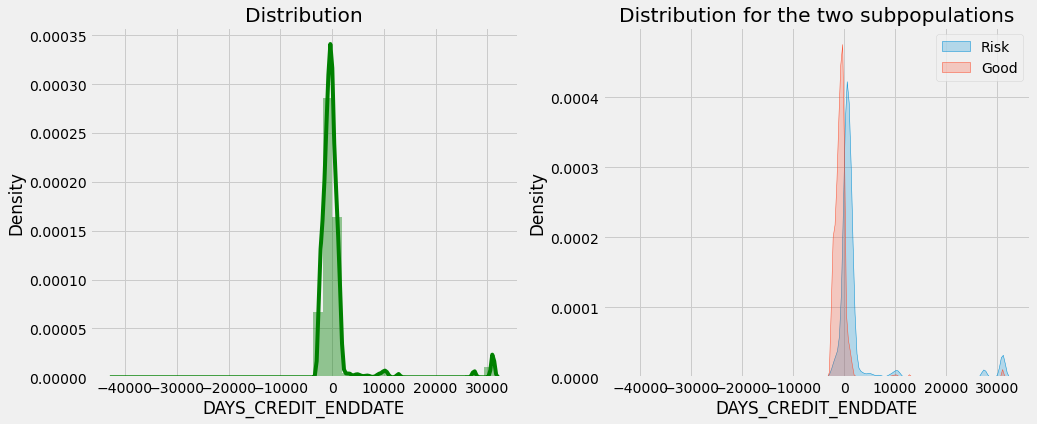

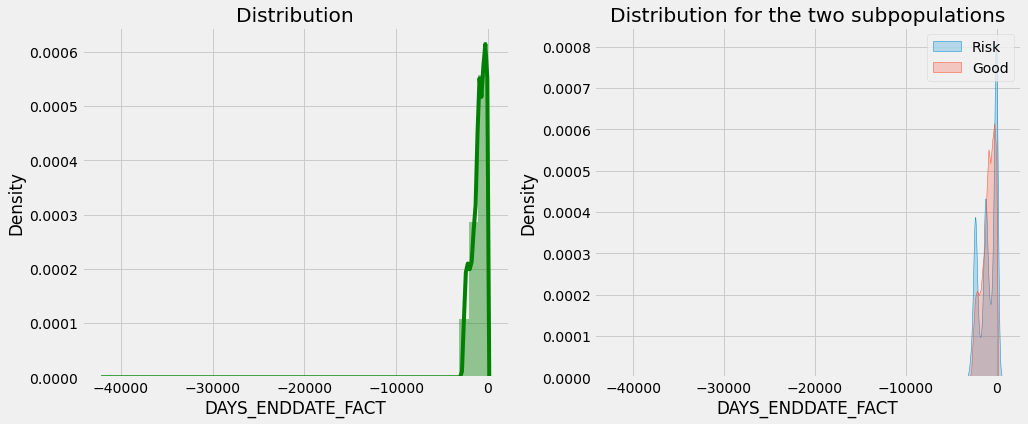

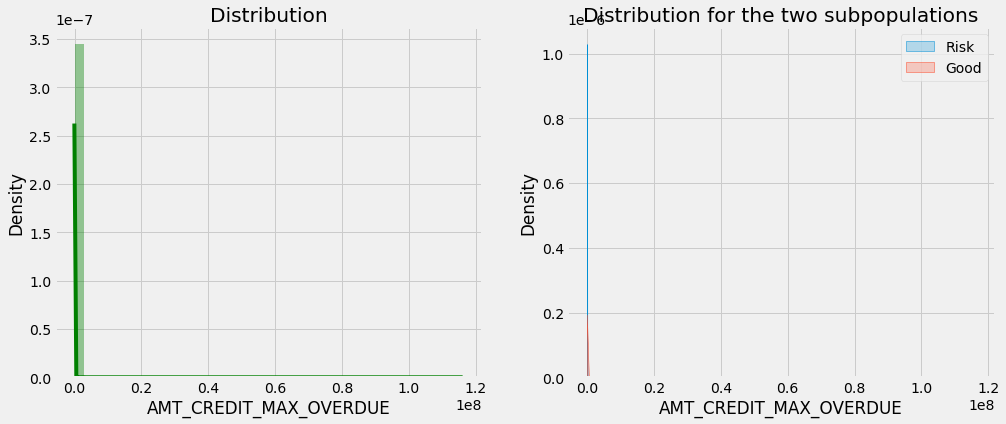

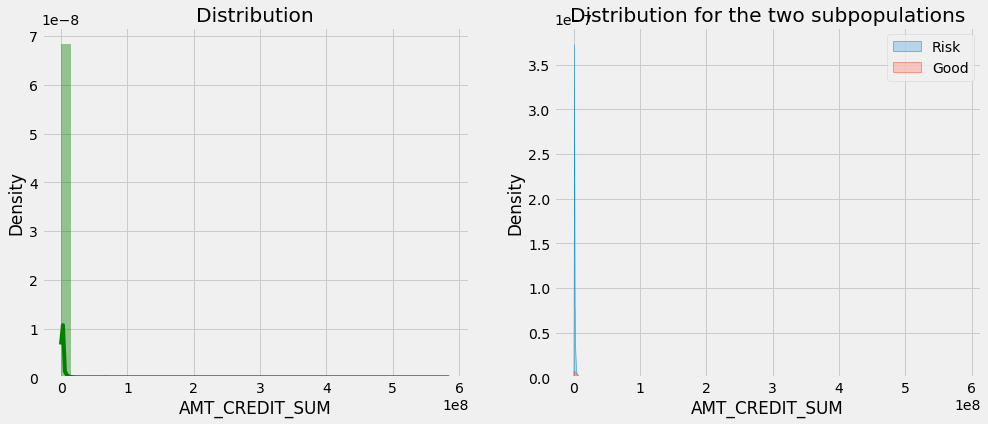

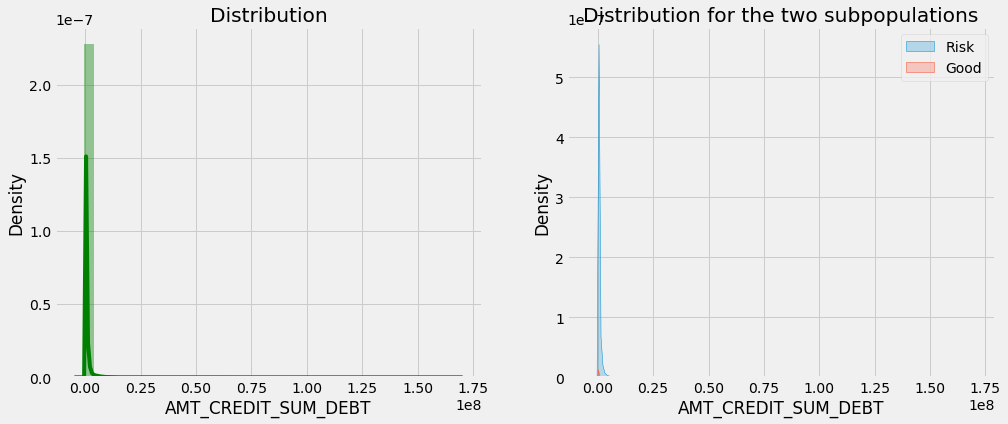

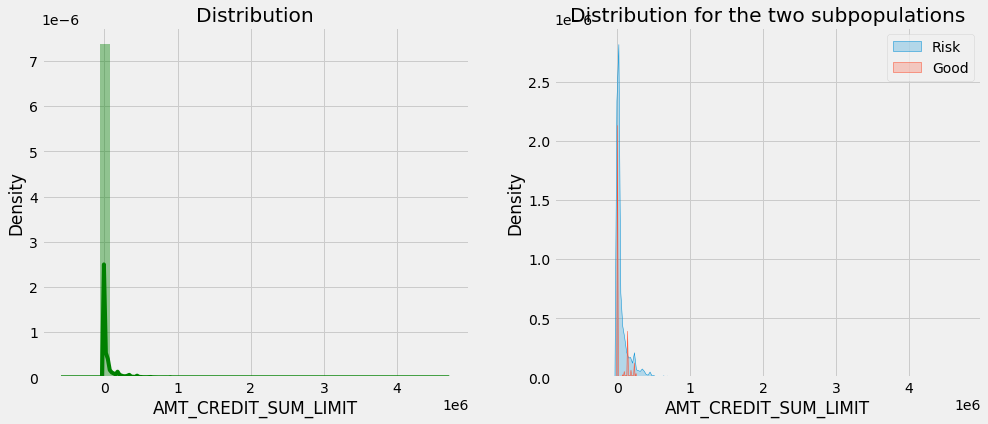

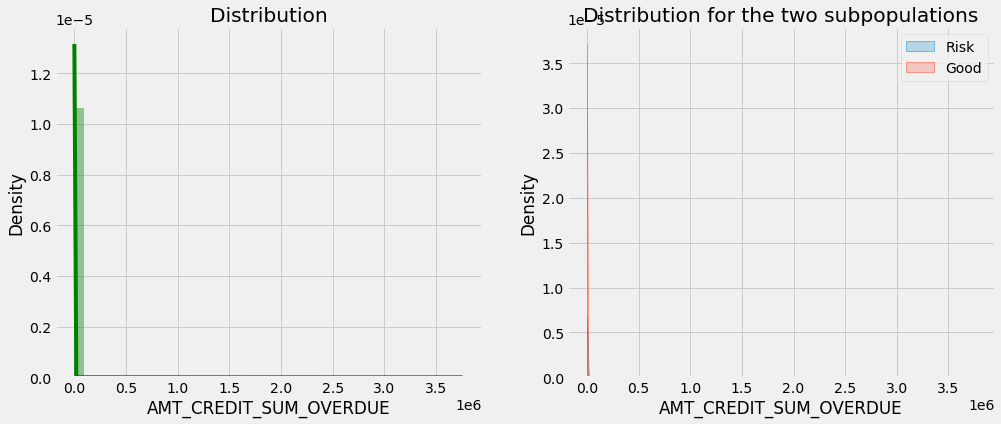

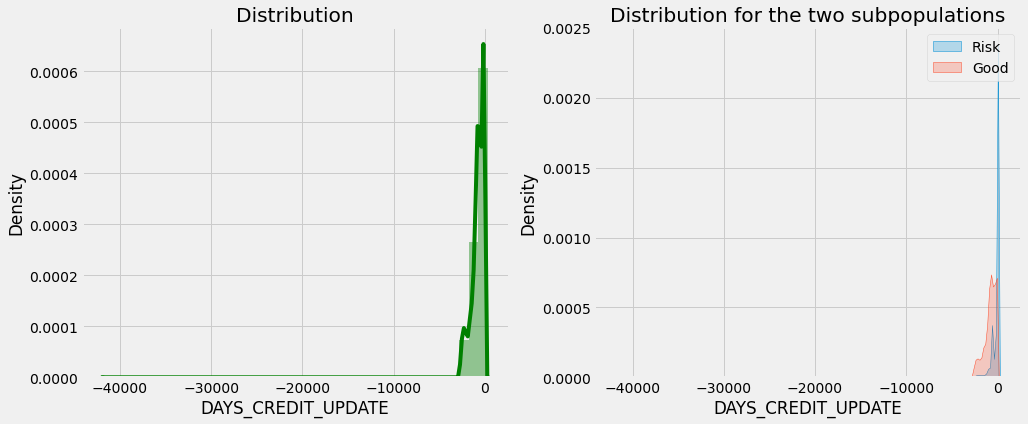

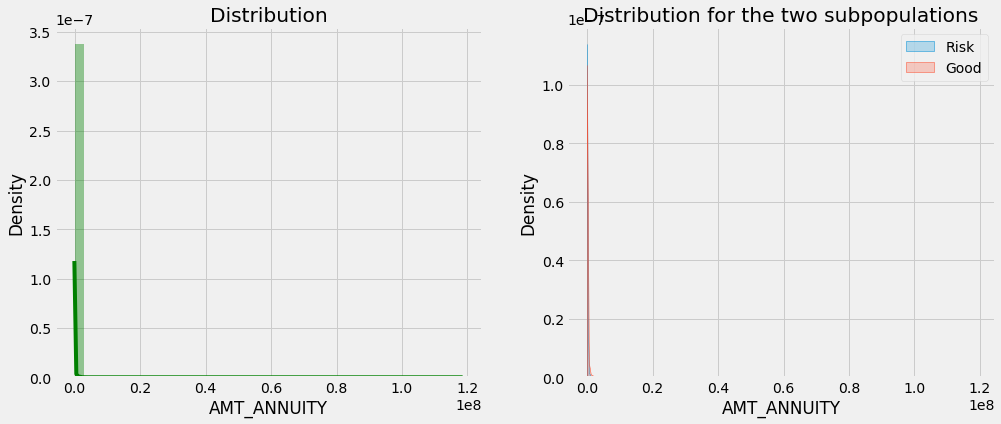

In [9]:
num_summary(bureau,num_cols,"CREDIT_ACTIVE")